[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://raw.githubusercontent.com/GrayLand119/GLColabNotes/master/Notes/BasicClassificationFasionMNIST.ipynb)


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# train_labels is an array like [9 0 0 ... 3 0 5]
# print(train_labels)

# print(type(train_images))
# print(type(train_images[0]))
# print(train_images[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   

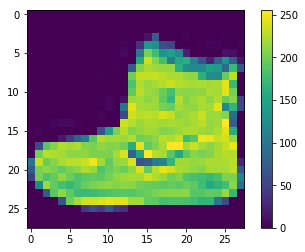

In [10]:
plt.imshow(train_images[0])
plt.colorbar()

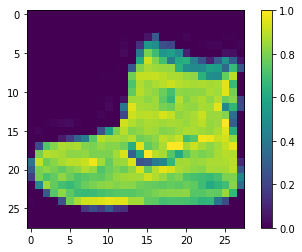

In [11]:
image1 = train_images[0]
image2 = image1 / 255.0
plt.imshow(image2)
plt.colorbar()

# 映射标签

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

# 数据预处理
在训练网络之前必须对数据进行预处理。 如果您检查训练集中的第一个图像，您将看到像素值落在0到255的范围内:


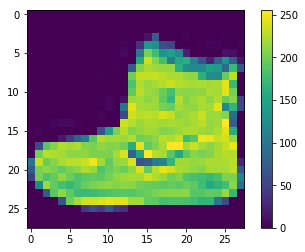

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

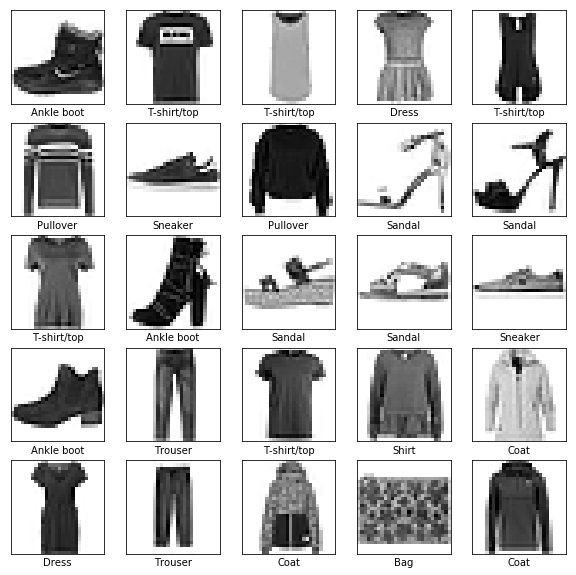

In [20]:
plt.figure(figsize=(10, 10), facecolor="white")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


网络中的第一层, tf.keras.layers.Flatten, 将图像格式从一个二维数组(包含着28x28个像素)转换成为一个包含着28 * 28 = 784个像素的一维数组。可以将这个网络层视为它将图像中未堆叠的像素排列在一起。这个网络层没有需要学习的参数;它仅仅对数据进行格式化。

在像素被展平之后，网络由一个包含有两个tf.keras.layers.Dense网络层的序列组成。他们被称作稠密链接层或全连接层。 第一个Dense网络层包含有128个节点(或被称为神经元)。第二个(也是最后一个)网络层是一个包含10个节点的softmax层—它将返回包含10个概率分数的数组，总和为1。每个节点包含一个分数，表示当前图像属于10个类别之一的概率。

编译模型
在模型准备好进行训练之前，它还需要一些配置。这些是在模型的编译(compile)步骤中添加的:

损失函数 —这可以衡量模型在培训过程中的准确程度。 我们希望将此函数最小化以"驱使"模型朝正确的方向拟合。
优化器 —这就是模型根据它看到的数据及其损失函数进行更新的方式。
评价方式 —用于监控训练和测试步骤。以下示例使用准确率(accuracy)，即正确分类的图像的分数。

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


训练模型
训练神经网络模型需要以下步骤:

将训练数据提供给模型 - 在本案例中，他们是train_images和train_labels数组。
模型学习如何将图像与其标签关联
我们使用模型对测试集进行预测, 在本案例中为test_images数组。我们验证预测结果是否匹配test_labels数组中保存的标签。
通过调用model.fit方法来训练模型 — 模型对训练数据进行"拟合"。

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4926 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3733 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3354 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3119 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2932 - acc: 0.8923


# 评估准确率

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.3636 - acc: 0.8694
Test accuracy: 0.8694


In [26]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([5.0188237e-07, 5.8537967e-08, 1.0304968e-05, 6.6919146e-09,
       5.3491408e-06, 1.2060225e-02, 5.6988188e-06, 4.8441820e-02,
       4.7849894e-06, 9.3947124e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


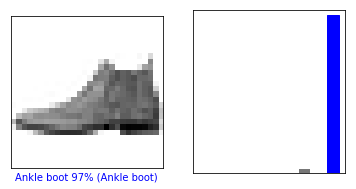

In [22]:
i = 0
plt.figure(figsize=(6, 3), facecolor="white", edgecolor="black")
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()


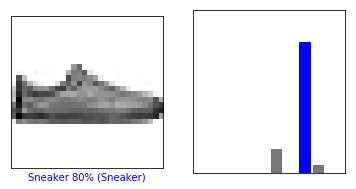

In [31]:
i = 12
plt.figure(figsize=(6, 3), facecolor="white", edgecolor="black")
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()


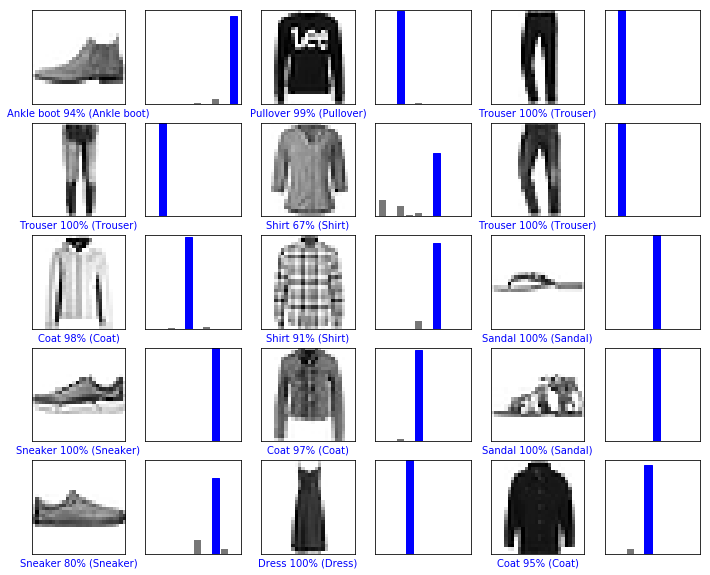

In [32]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows), facecolor="white")
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()


最后，使用训练的模型对单个图像进行预测。

(28, 28)


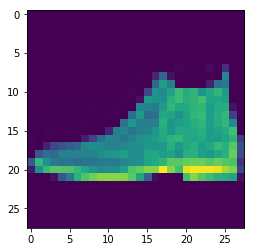

In [33]:
# 从测试数据集中获取图像
img = test_images[0]

print(img.shape)
plt.figure(facecolor="white")
plt.imshow(img)
plt.show()


In [34]:
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.0188288e-07 5.8537967e-08 1.0304968e-05 6.6919146e-09 5.3491353e-06
  1.2060219e-02 5.6988133e-06 4.8441812e-02 4.7849890e-06 9.3947124e-01]]


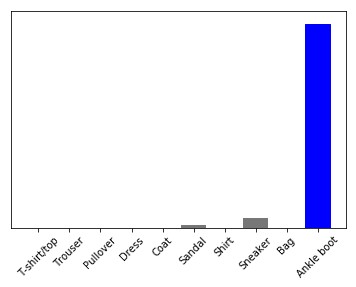

In [36]:
plt.figure(facecolor="white")
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

(28, 28)
(1, 28, 28)


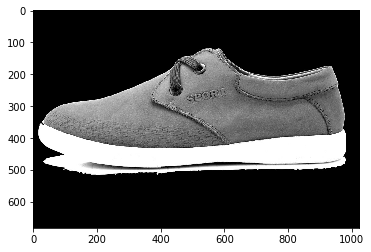

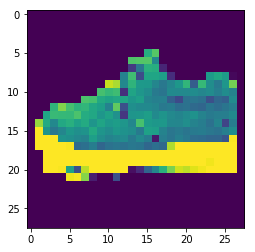

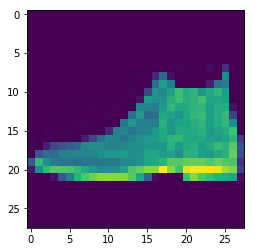

In [38]:
import os
import sys

curDir = os.getcwd() + "/BasicClassification/shoes4.jpg"

# print(test_images[0]) # 二维数组 [[...], [...], ...]
predic_img = None
img_raw_jpg = tf.gfile.GFile(curDir, 'rb').read()
# print(img_raw_jpg) # Bytes
    
with tf.Session() as sess:
    img_data_jpg = tf.image.decode_jpeg(img_raw_jpg)
    img_gray_data = tf.image.rgb_to_grayscale(img_data_jpg)
    img_gray_data = sess.run(img_gray_data)
    img_data_jpg = sess.run(img_data_jpg)
    # print(img_gray_data) # 三维数组 1通道
    img_gray_d = tf.image.resize_images(img_gray_data, [28, 28], tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    img_gray_d2 = tf.reshape(img_gray_d, [28, -1])
    img_gray_d2 = tf.image.convert_image_dtype(img_gray_d2, tf.uint8)
    img_gray_d2 = sess.run(img_gray_d2)
    # print(img_gray_d2)
    plt.subplots(1)
    plt.imshow(img_data_jpg)
    plt.subplots(1)
    img_gray_d2 = img_gray_d2 / 255.0
    plt.imshow(img_gray_d2)
    plt.subplots(1)
    plt.imshow(test_images[0])
    # print(img_data_jpg)  # 三维数组
    
    print(img_gray_d2.shape)
    
    predic_img = (np.expand_dims(img_gray_d2, 0))
    print(predic_img.shape)

In [36]:
print(predic_img)
print(test_images[0])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 159 188
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 185 187 187 119
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1  42 101 162 159
    26   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  

In [39]:
predictions_single = model.predict(predic_img)
print(predictions_single)


[[2.3683617e-07 2.5683622e-07 2.0362324e-05 5.8954083e-08 3.4475404e-05
  9.9861085e-01 1.9169165e-06 2.2868937e-04 4.3236176e-04 6.7065581e-04]]


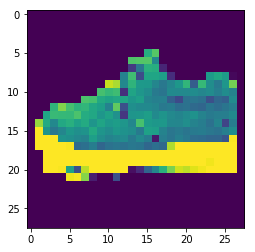

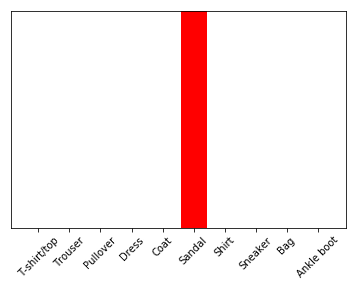

In [40]:

plt.imshow(img_gray_d2)
plt.figure(facecolor="white")
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()
